In [157]:
import pandas as pd               
import numpy as np               
import matplotlib.pyplot as plt   
import seaborn as sns    

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [184]:
df = pd.read_csv('AB_NYC_2019.csv')
df = df.drop(['id','name','host_id','host_name','last_review', 'reviews_per_month'], 1)
print('Размер выборки:', df.shape)                        
df.head( ) 

Размер выборки: (48895, 10)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


Variable description is available at:
https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 3.7+ MB


In [160]:
df.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [161]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


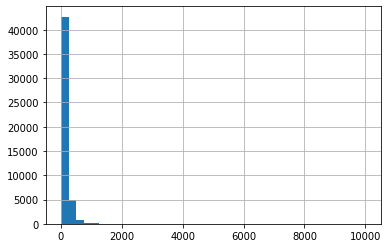

In [24]:
df.price.hist(bins=40);

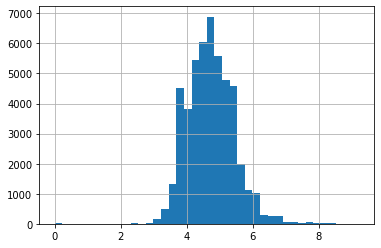

In [185]:
df.price.replace(0, 1, inplace=True) # замена цен с 0 на 1 (для логарифмирования)
df['price'] = np.log(df['price'])
df.price.hist(bins=40);

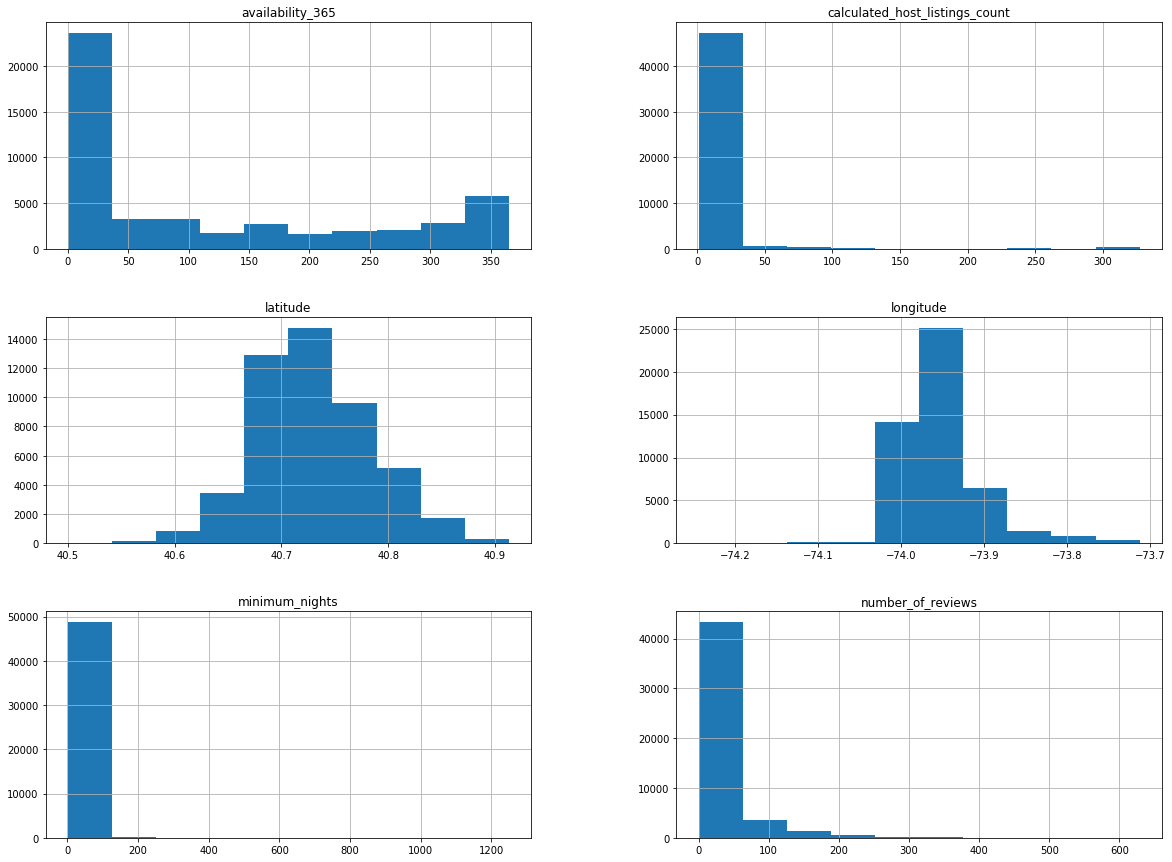

In [26]:
df.drop('price',axis=1).hist(figsize=(20, 15));

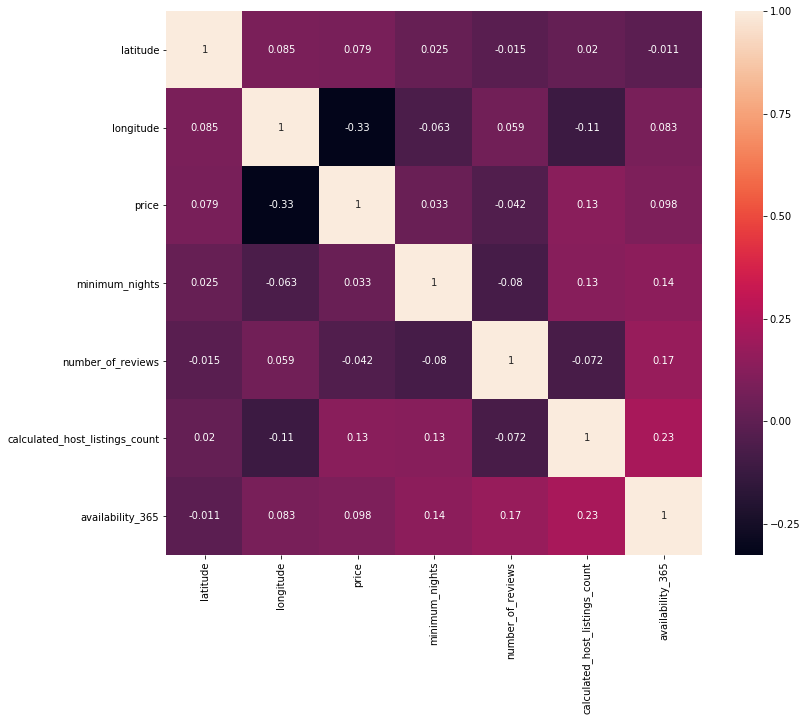

In [163]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(df.corr(), annot=True);
# ax.get_ylim() => (6.5, 0.5)
ax.set_ylim(7, 0) # fix cutted edges
ax

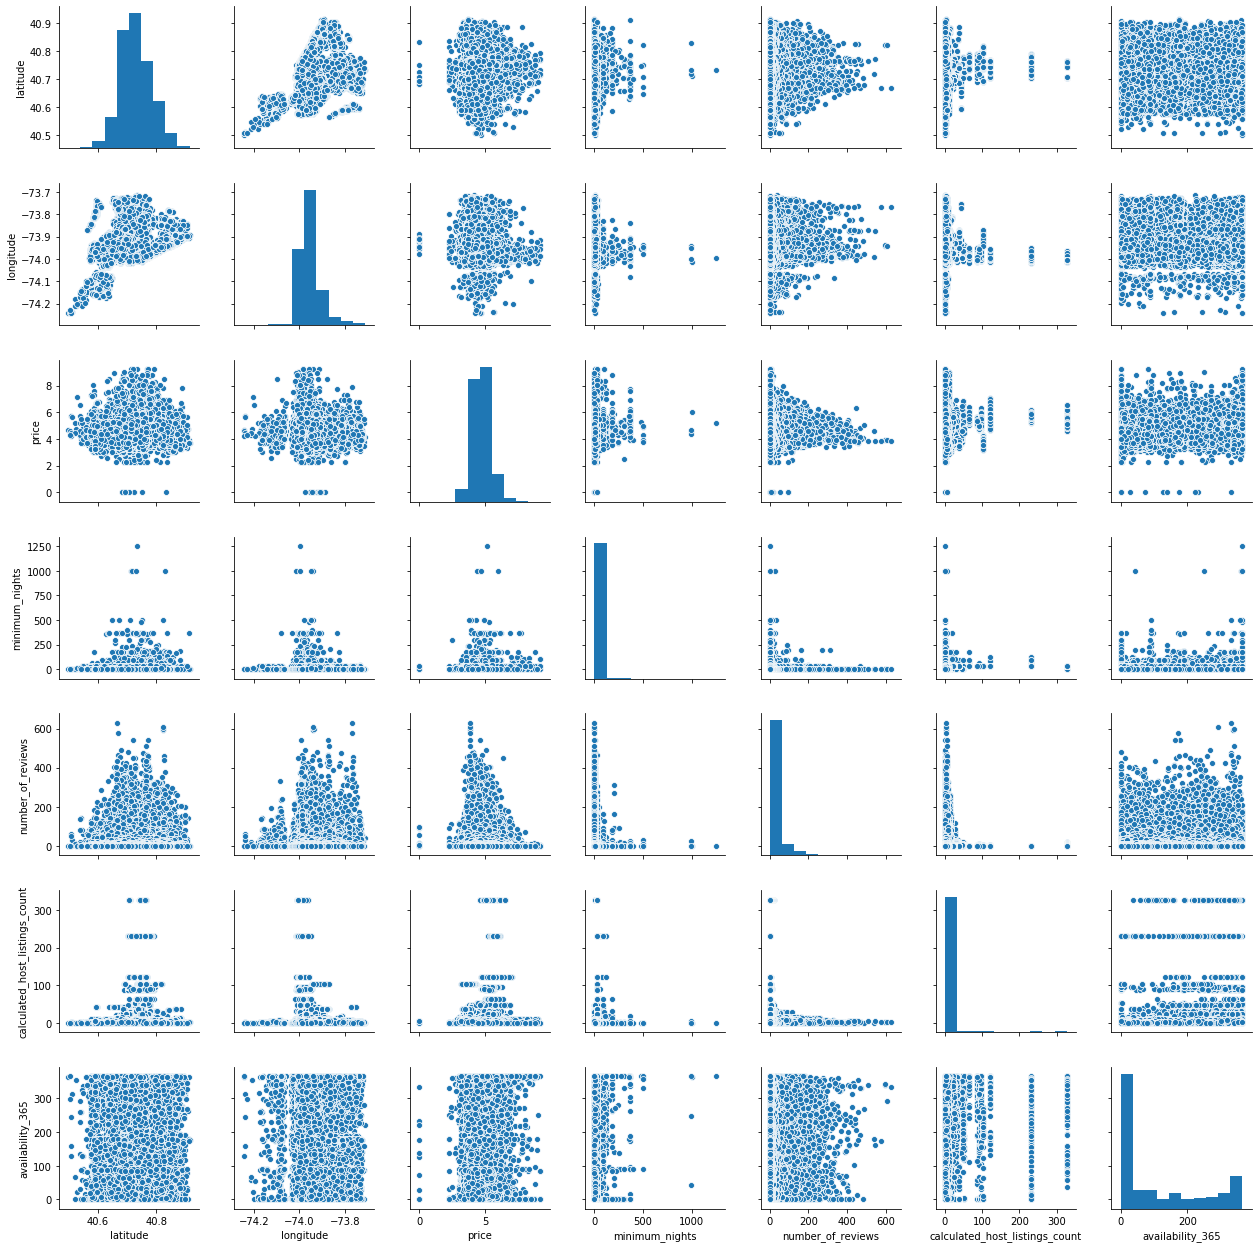

In [28]:
sns.pairplot(df)

In [164]:
df.head() 

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,5.003946,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,5.416100,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,5.010635,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,4.488636,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,4.382027,10,9,1,0


### Предобработка категориальных переменных

In [186]:
# OHE for room_type
df_categor = pd.get_dummies(df['room_type'], drop_first=True, prefix='rt')
df = pd.concat([df.drop('room_type',axis=1),df_categor], axis=1)
df.head() 

,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rt_Private room,rt_Shared room
0,Brooklyn,Kensington,40.64749,-73.97237,5.003946,1,9,6,365,1,0
1,Manhattan,Midtown,40.75362,-73.98377,5.416100,1,45,2,355,0,0
2,Manhattan,Harlem,40.80902,-73.94190,5.010635,3,0,1,365,1,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,4.488636,1,270,1,194,0,0
4,Manhattan,East Harlem,40.79851,-73.94399,4.382027,10,9,1,0,0,0


In [187]:
# OHE for neighbourhood_group
# df_categor = pd.get_dummies(df['neighbourhood_group'], drop_first=True, prefix='ng')
# df = pd.concat([df.drop('neighbourhood_group',axis=1),df_categor], axis=1)
# df.head() 
df = df.drop(['neighbourhood_group'], 1)

In [188]:
# OHE for neighbourhood
df_categor = pd.get_dummies(df['neighbourhood'], drop_first=True, prefix='n')
df = pd.concat([df.drop('neighbourhood',axis=1),df_categor], axis=1)
df.head() 
# df = df.drop(['neighbourhood'], 1)

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rt_Private room,rt_Shared room,n_Arden Heights,...,n_Westerleigh,n_Whitestone,n_Williamsbridge,n_Williamsburg,n_Willowbrook,n_Windsor Terrace,n_Woodhaven,n_Woodlawn,n_Woodrow,n_Woodside
0,40.64749,-73.97237,5.003946,1,9,6,365,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.75362,-73.98377,5.416100,1,45,2,355,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,5.010635,3,0,1,365,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40.68514,-73.95976,4.488636,1,270,1,194,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,4.382027,10,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Скалирование

In [189]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df_train[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [190]:
# Применяем скалировщик к трэйну
df_train_scale = scaler.transform(df_train[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]) 

# Применяем скалирвощик к тесту 
df_test_scale = scaler.transform(df_test[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']]) 


In [191]:
# Заменяем значения на отскалированные
df_train[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = df_train_scale
df_test[['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']] = df_test_scale


Делим данные на тренировочные и тестовые

In [192]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

In [193]:
# Вытаскиваем цены и параметры квартир по разным переменным для удобства 

y_train = df_train.price 
y_test = df_test.price 

X_train = df_train.drop('price', axis=1).get_values()
X_test = df_test.drop('price', axis=1).get_values()


In [194]:
# константный прогноз - самый худший из всех прогнозов

y_mean = np.mean(y_train)  # посчитали среднее 
y_pred_naive = np.ones(len(y_test)) * y_mean  # спрогнозировали им цену всех квартир в тестовой выборке
y_pred_naive[:5]

array([4.72481882, 4.72481882, 4.72481882, 4.72481882, 4.72481882])

In [195]:
# метрики качества
from sklearn import metrics

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true+1))) * 100

def print_metrics(y_test,y_pred):
    print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(y_pred))) # mean absolute error
    print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(y_pred)))) # mean squared error
    print('R2:',  metrics.r2_score(y_test, y_pred)) # in dollars
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred)) # mean absolute percentage error#
    pass

print_metrics(y_test, y_pred_naive)

MAE: 87.13593000532002
RMSE: 251.26275145695516
R2: -2.8711125552360883e-05
MAPE: 9.985972249950258


In [196]:
# моя первая регрессия

from sklearn.linear_model import LinearRegression

# Объявили модель
model_regression = LinearRegression()

# Обучили модель на тренировочной выборке 
model_regression.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_regr = model_regression.predict(X_test)

In [197]:
print_metrics(y_test,y_pred_regr)

MAE: 63.12128461956517
RMSE: 234.74086557739602
R2: 0.5382769289453134
MAPE: 6.004706657806943


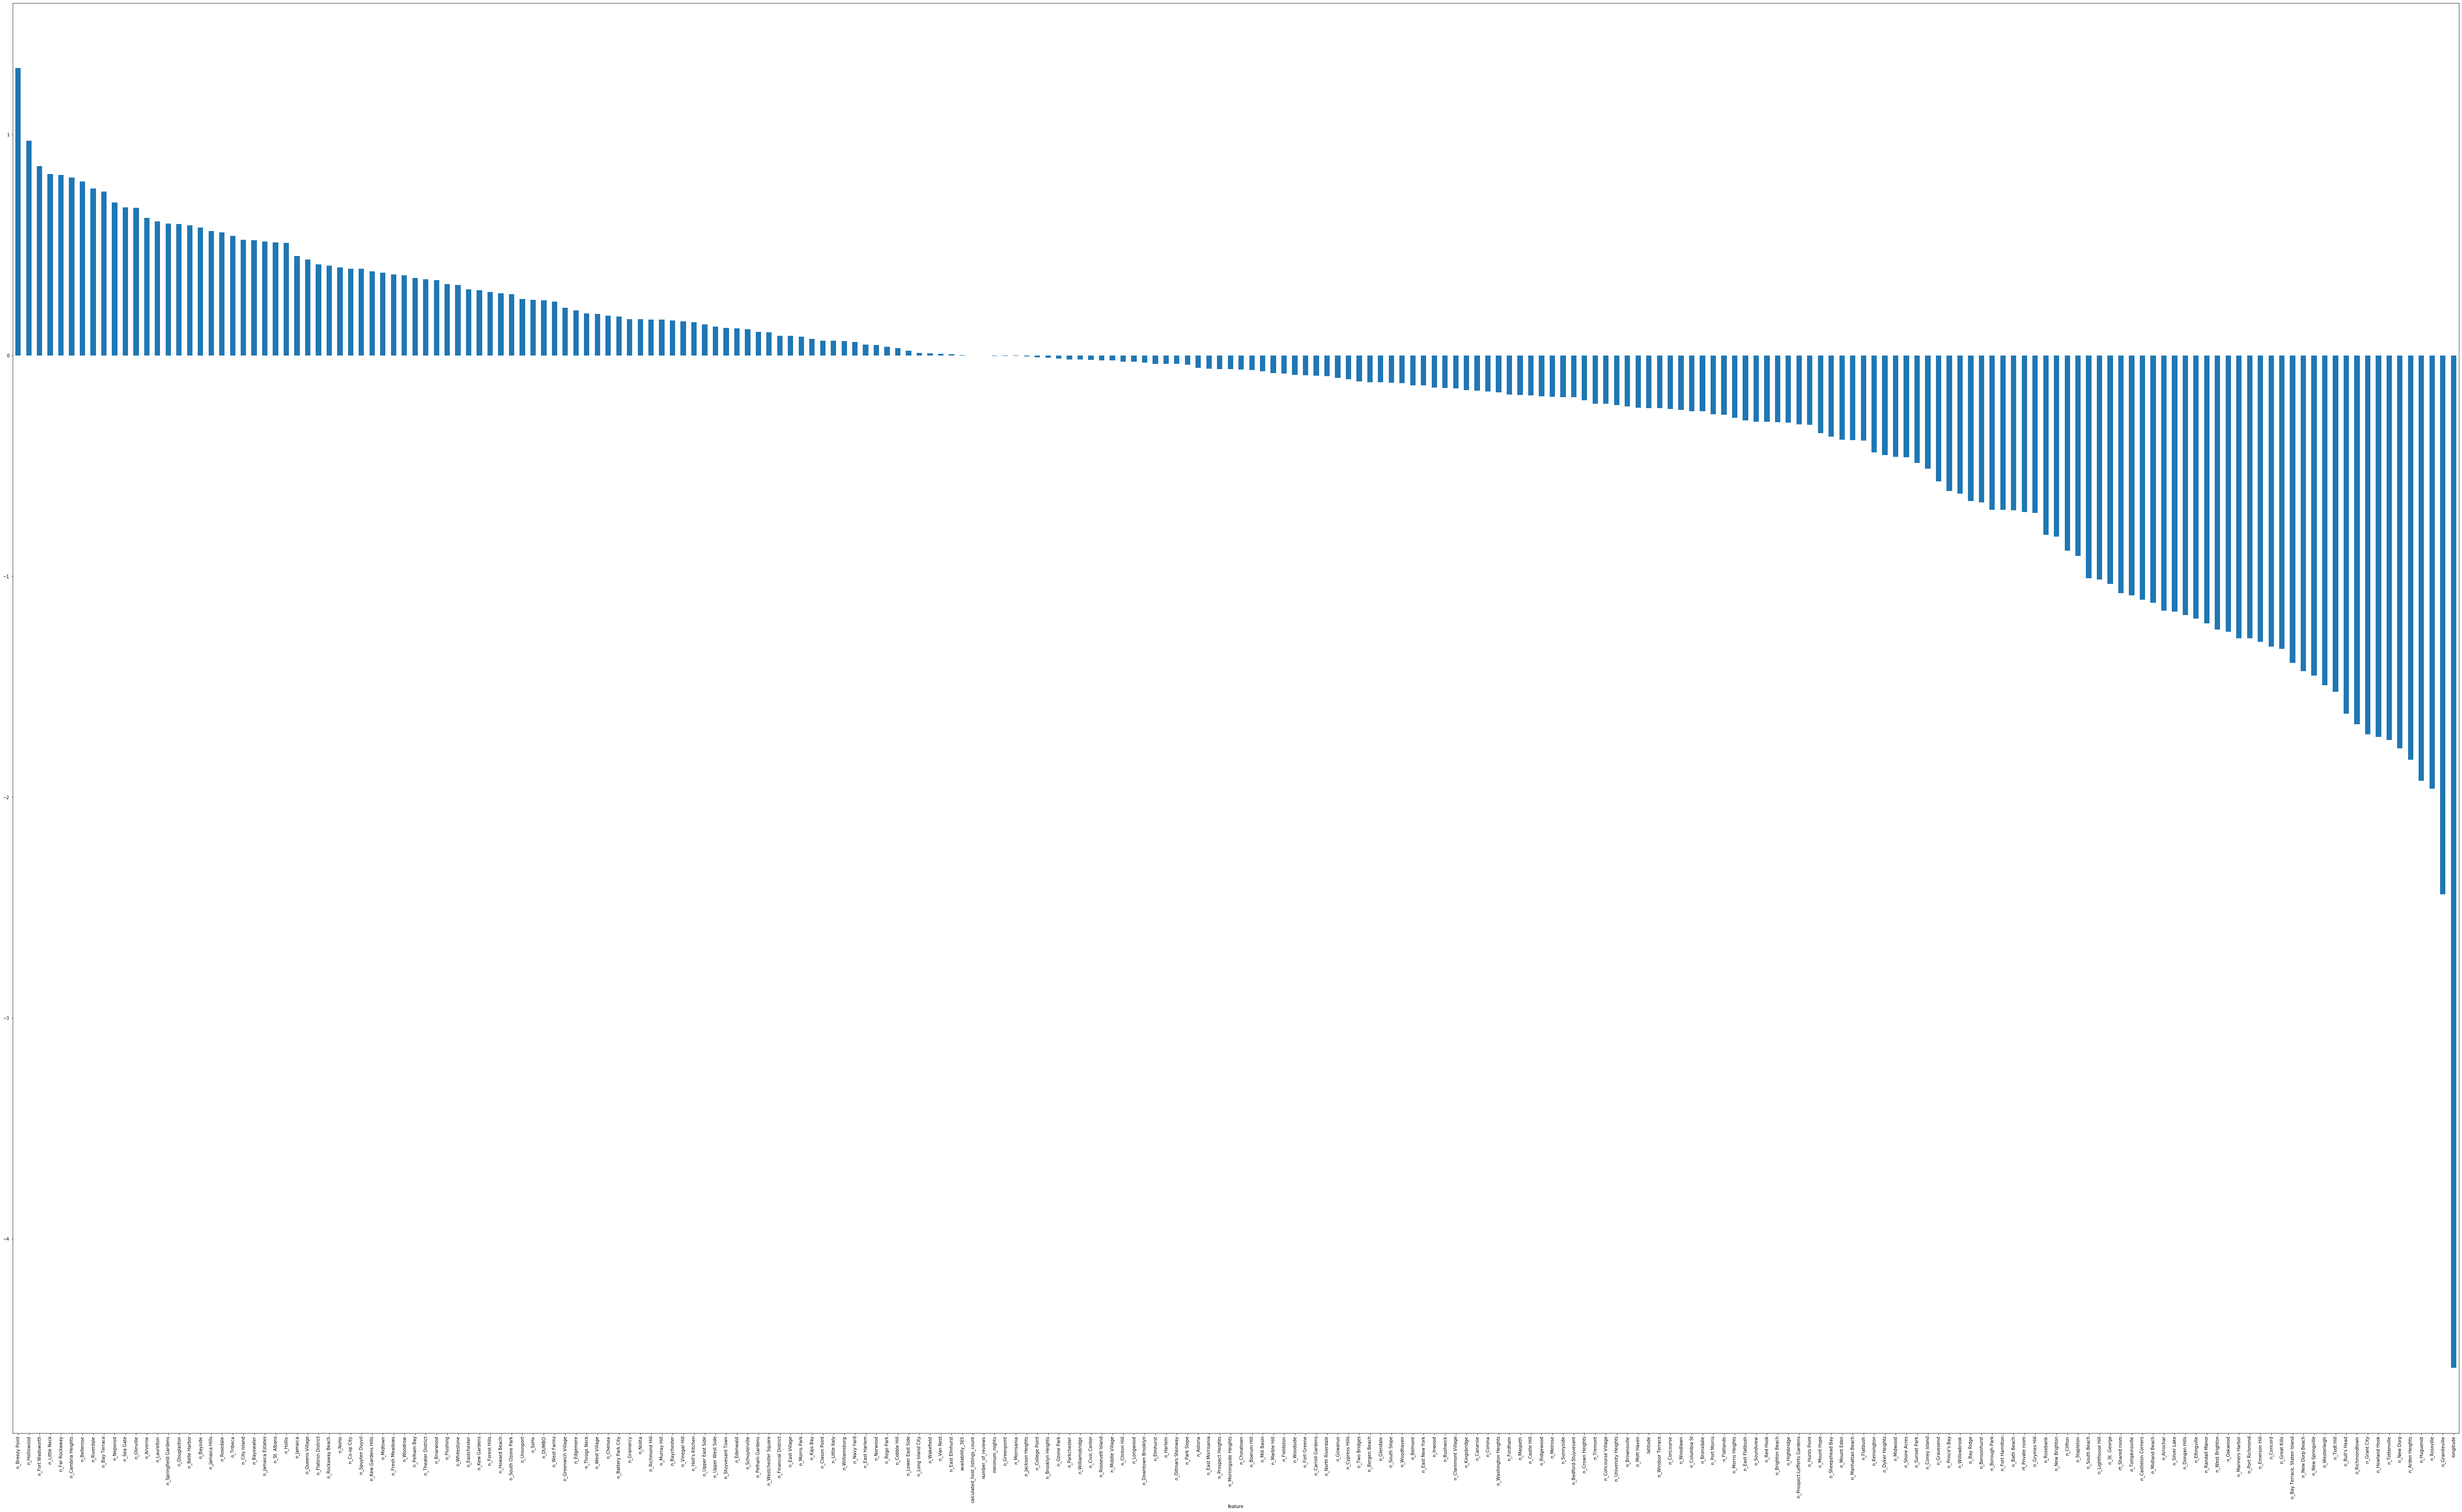

In [198]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": model_regression.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(100, 60));

In [199]:
# Lasso регрессия
from sklearn.linear_model import Lasso

# Объявили модель
model_simplelasso = Lasso()

# Обучили модель на тренировочной выборке 
model_simplelasso.fit(X_train, y_train)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [200]:
from sklearn.model_selection import GridSearchCV

# Решётка для перебора параметра 
param_grid = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.5, 0.8, 1, 5, 10]}

# Объявили модель 
model_lasso = Lasso() 

# Объявили перебор 
grid_cv_lasso = GridSearchCV(model_lasso, param_grid, cv = 5)
grid_cv_lasso.fit(X_train, y_train)
print('Лучшее значение параметра:', grid_cv_lasso.best_params_)

# Сделали прогнозы
y_pred_lasso = grid_cv_lasso.predict(X_test)

Лучшее значение параметра: {'alpha': 0.001}


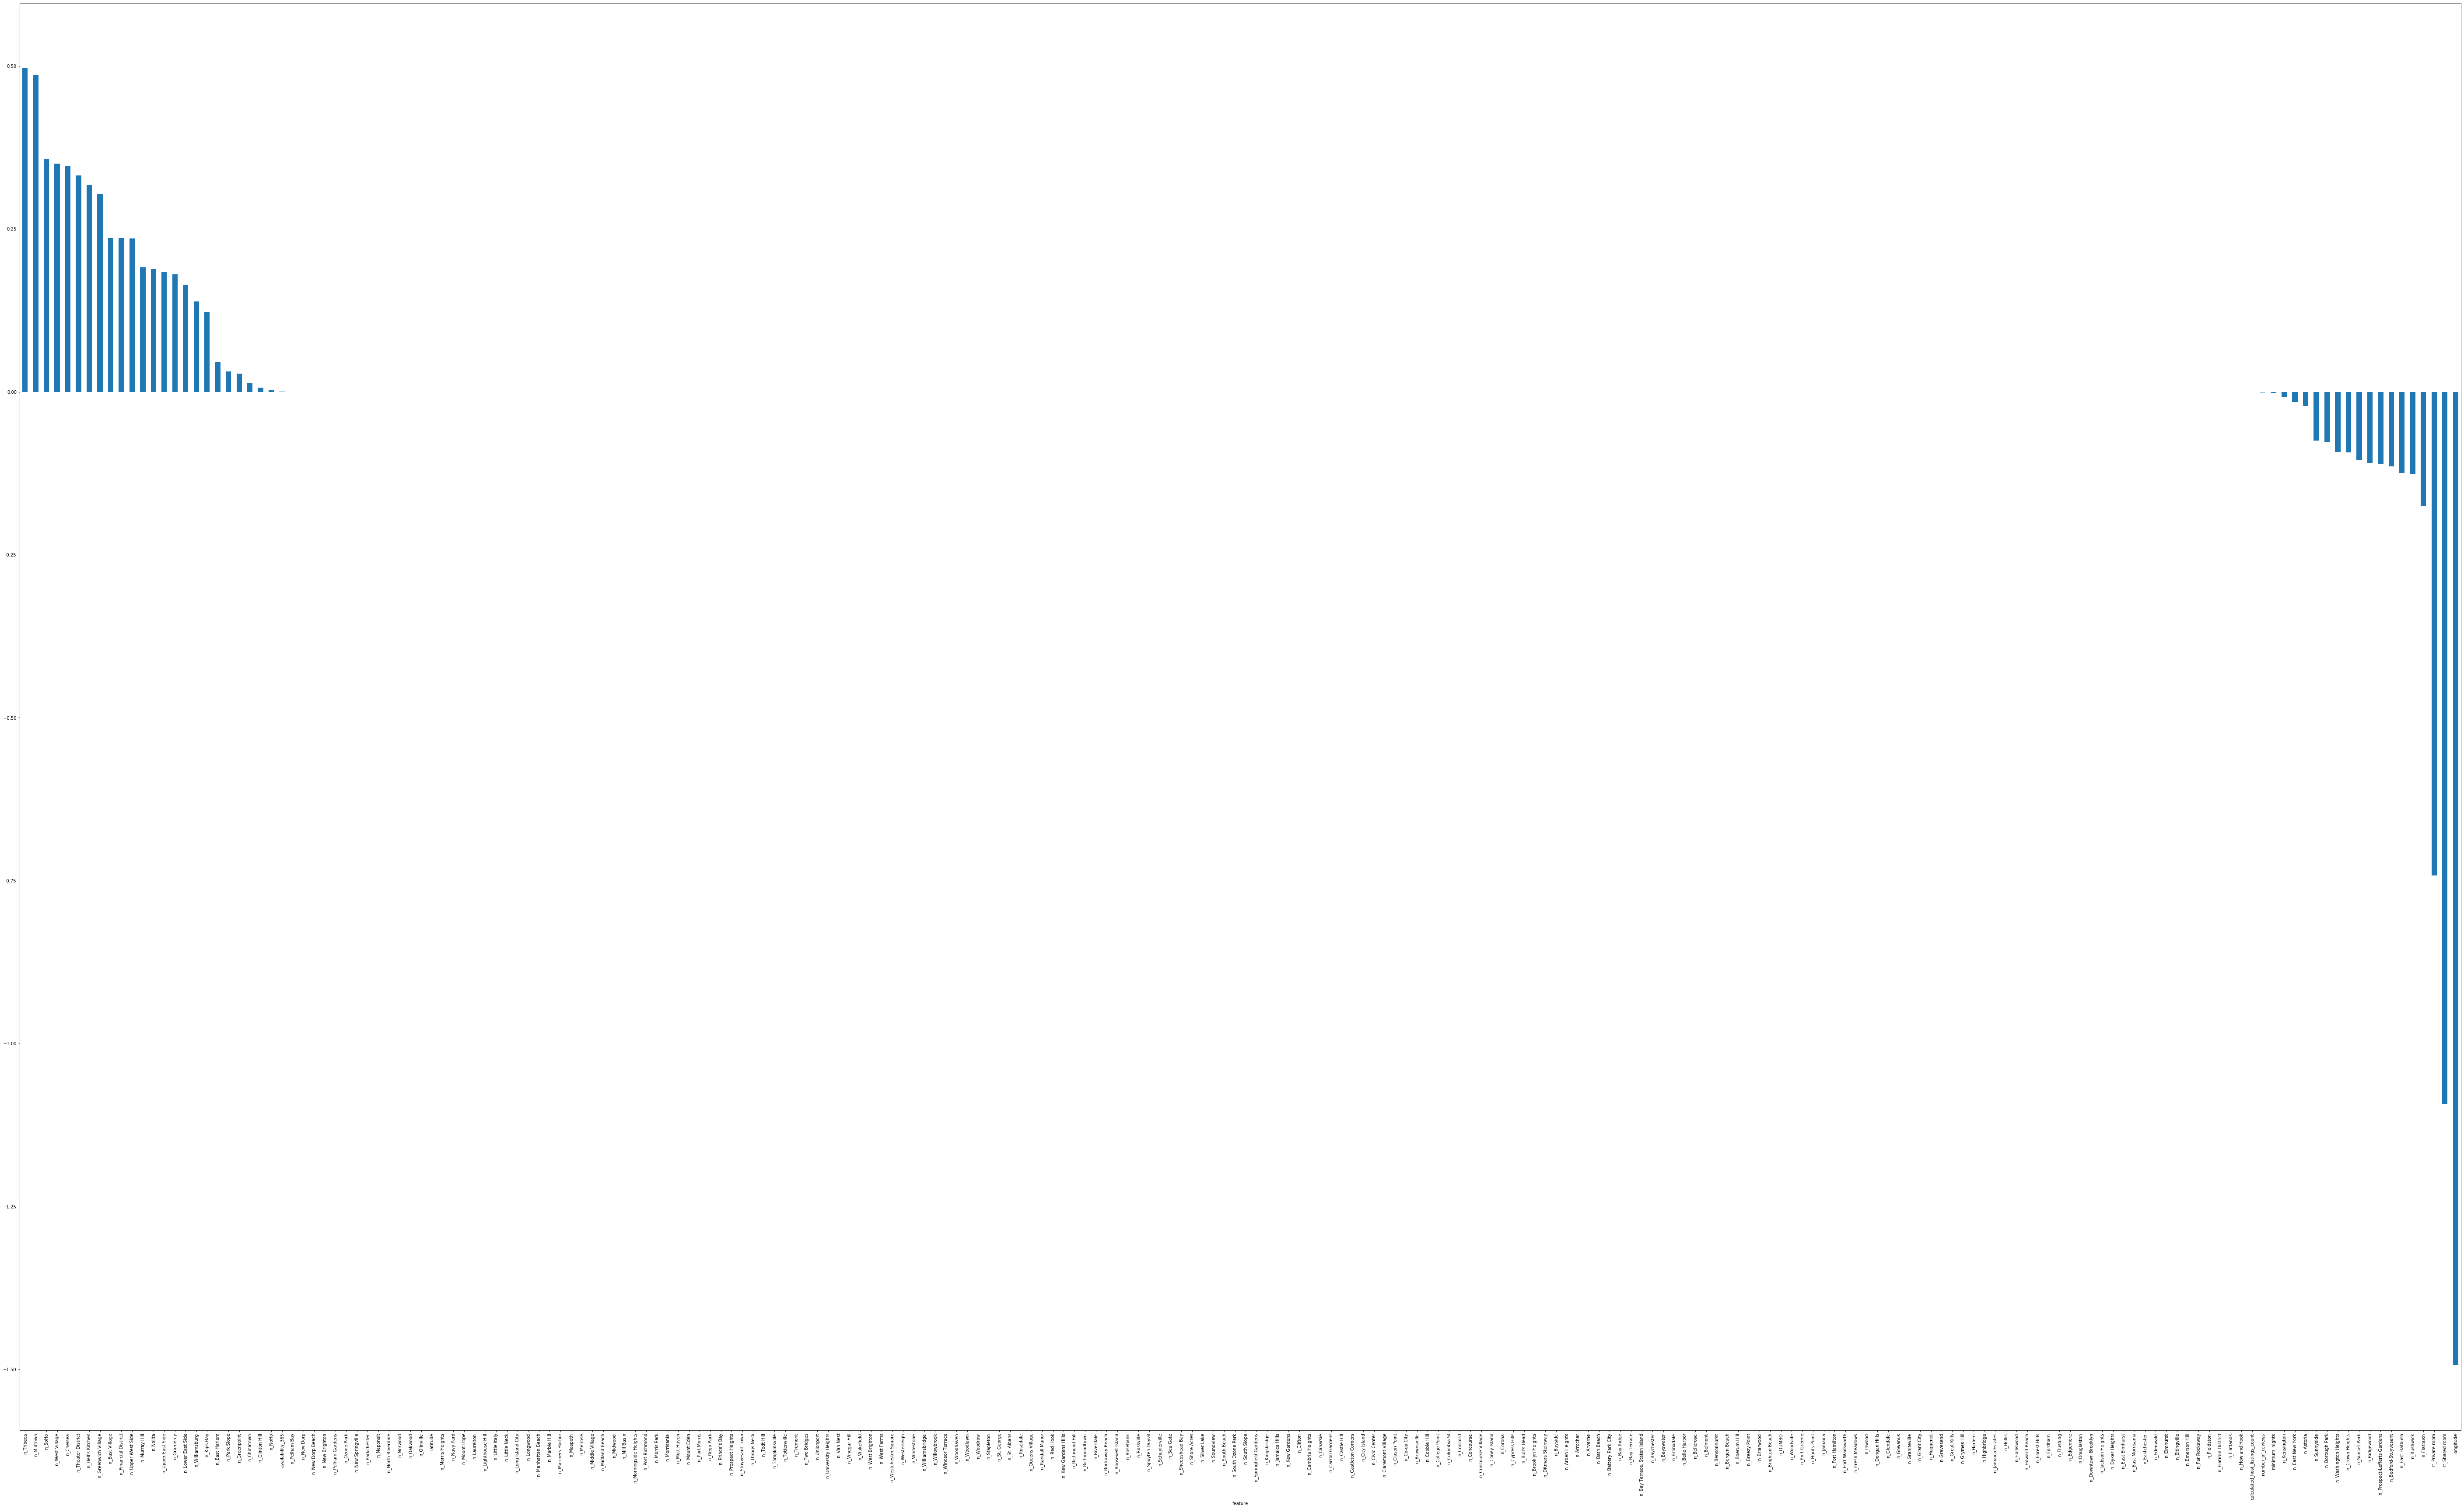

In [201]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": grid_cv_lasso.best_estimator_.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(100, 60));

In [202]:
print_metrics(y_test,y_pred_lasso)

MAE: 64.15301332038707
RMSE: 236.40145291266538
R2: 0.5124568971487767
MAPE: 6.225961264261089


In [203]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train, y_train)
print('Лучшее значение параметра:', lasso_cv.alpha_)

# Сделали прогнозы
y_pred_lasso_cv = lasso_cv.predict(X_test)

Лучшее значение параметра: 0.008685487140901473


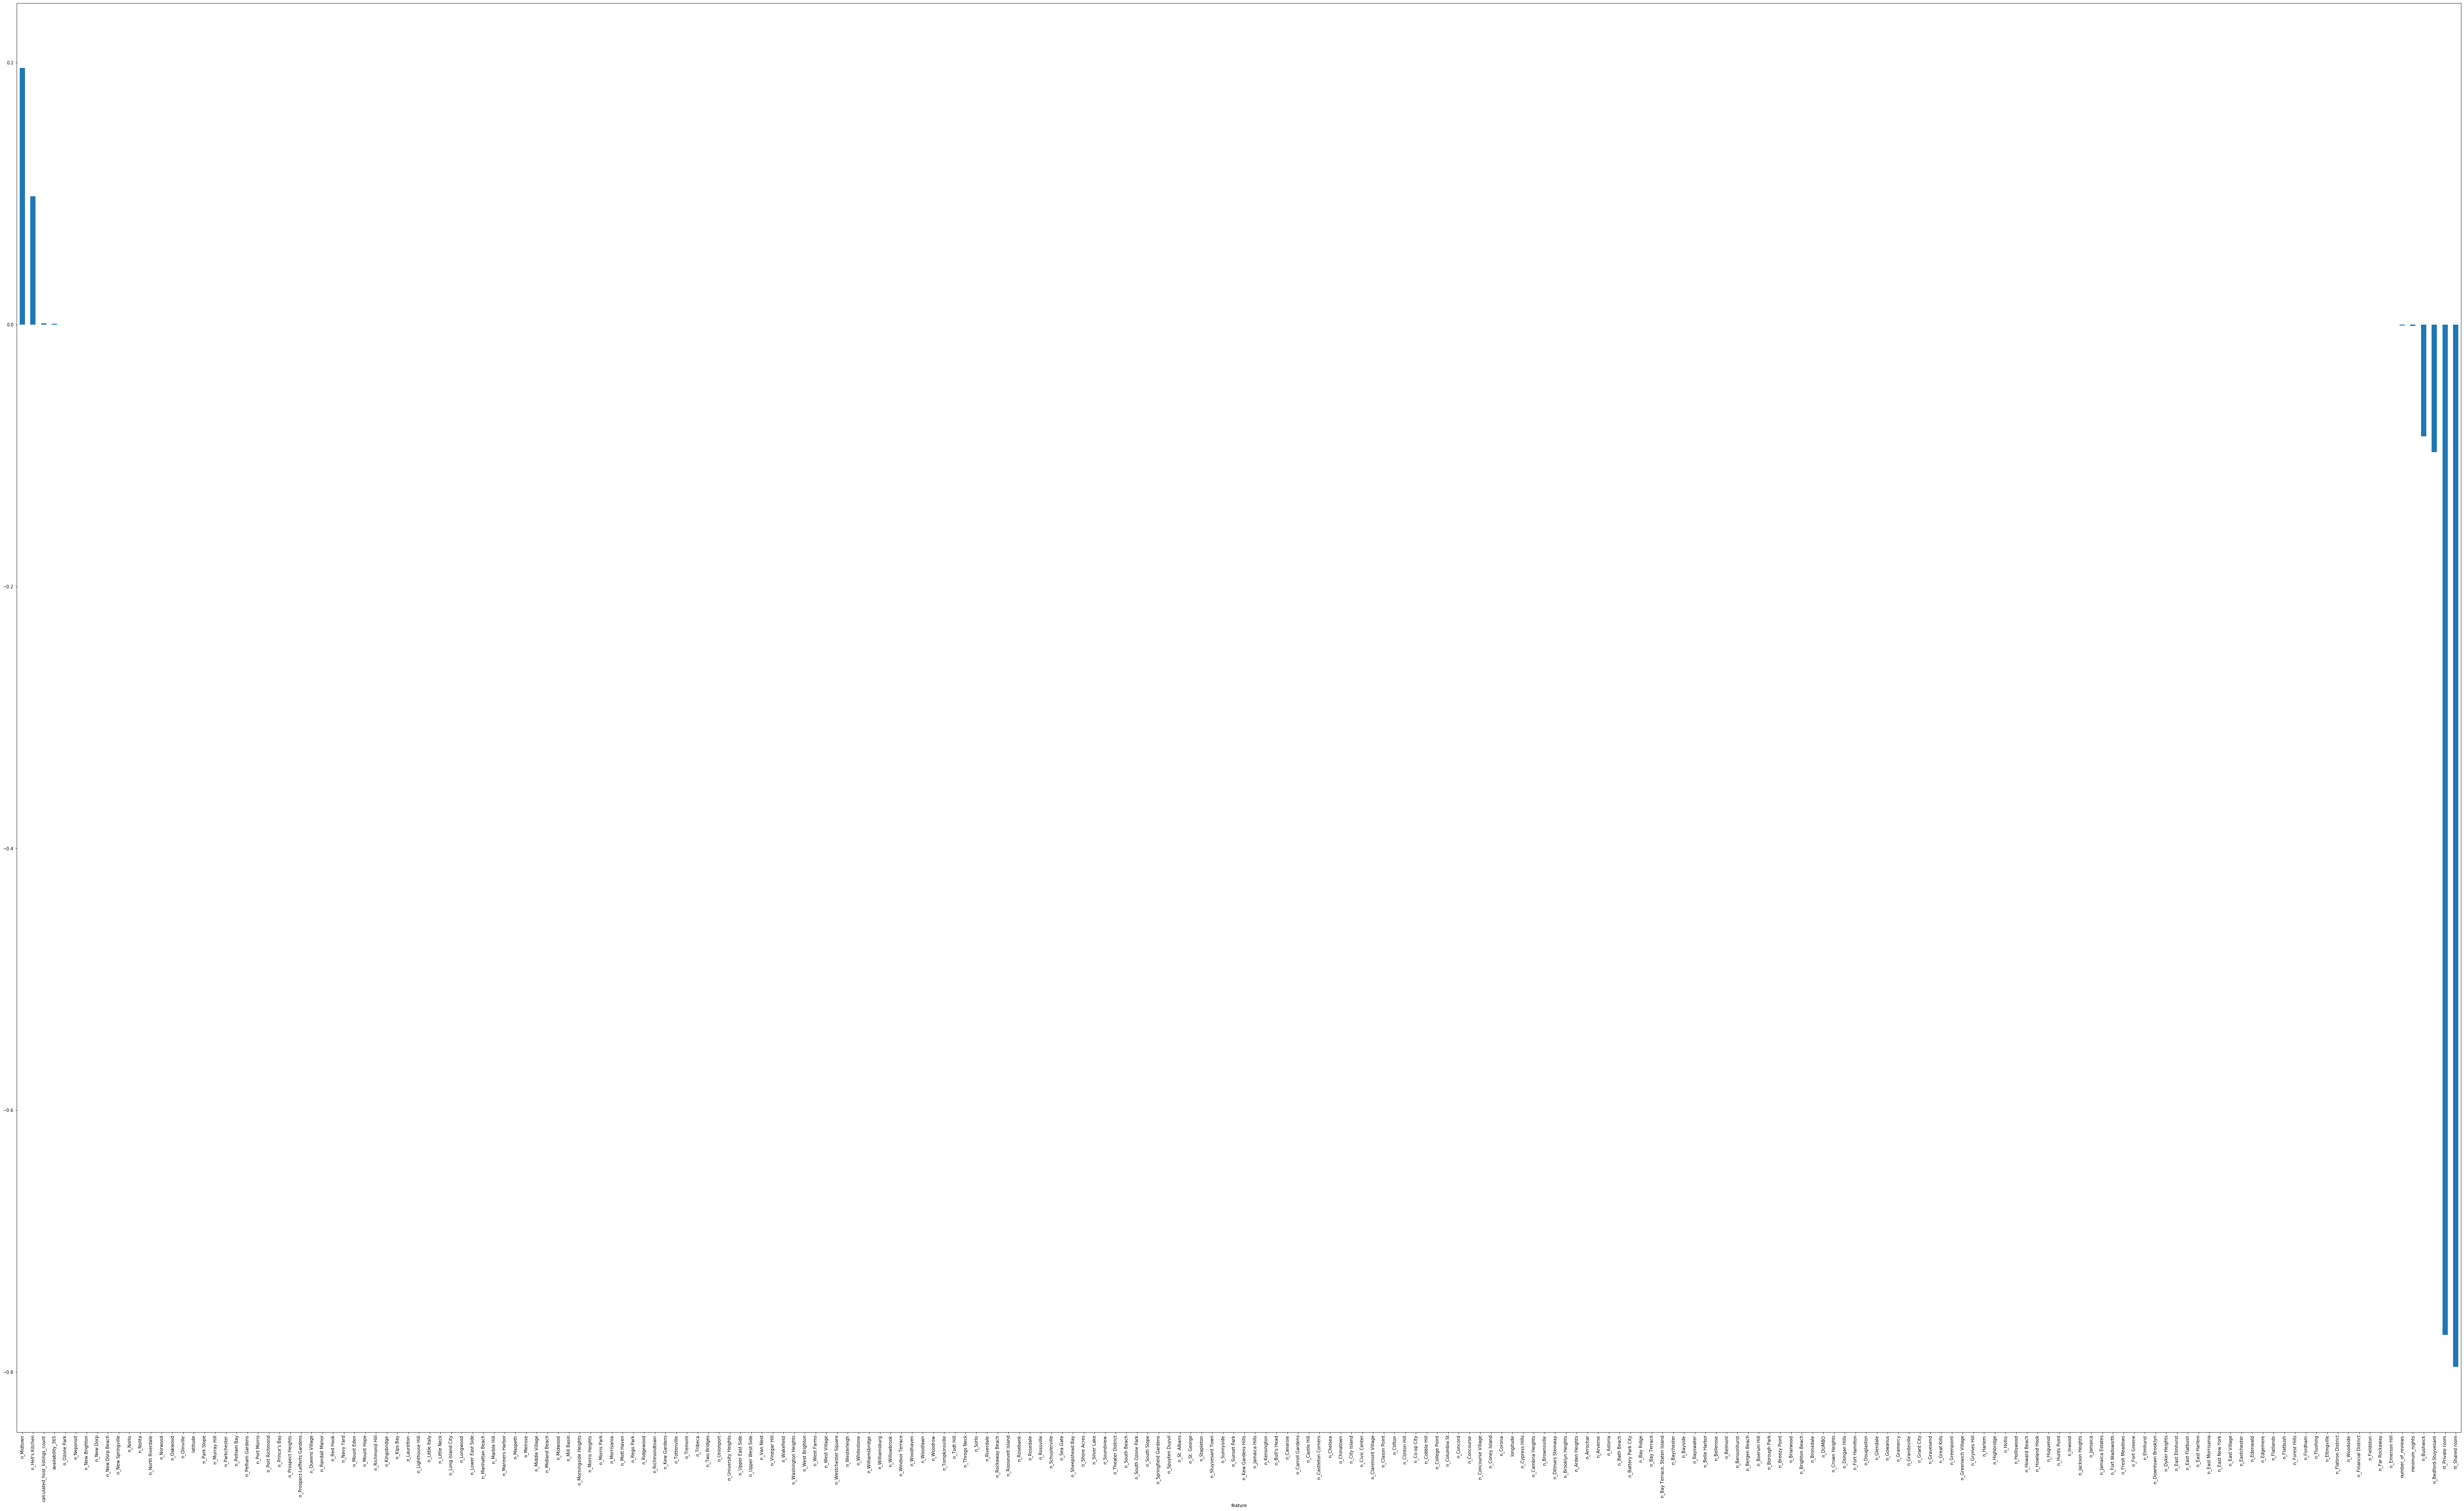

In [204]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": lasso_cv.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(100, 60));

In [205]:
print_metrics(y_test, y_pred_lasso_cv)

MAE: 68.97554419644136
RMSE: 240.69185461272482
R2: 0.41341820620366465
MAPE: 7.032037339649076


In [212]:
from sklearn.linear_model import ElasticNet

# Объявили модель
elastic_reg = ElasticNet(alpha=0.001)

# Обучили модель на тренировочной выборке 
elastic_reg.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_elastic = elastic_reg.predict(X_test)

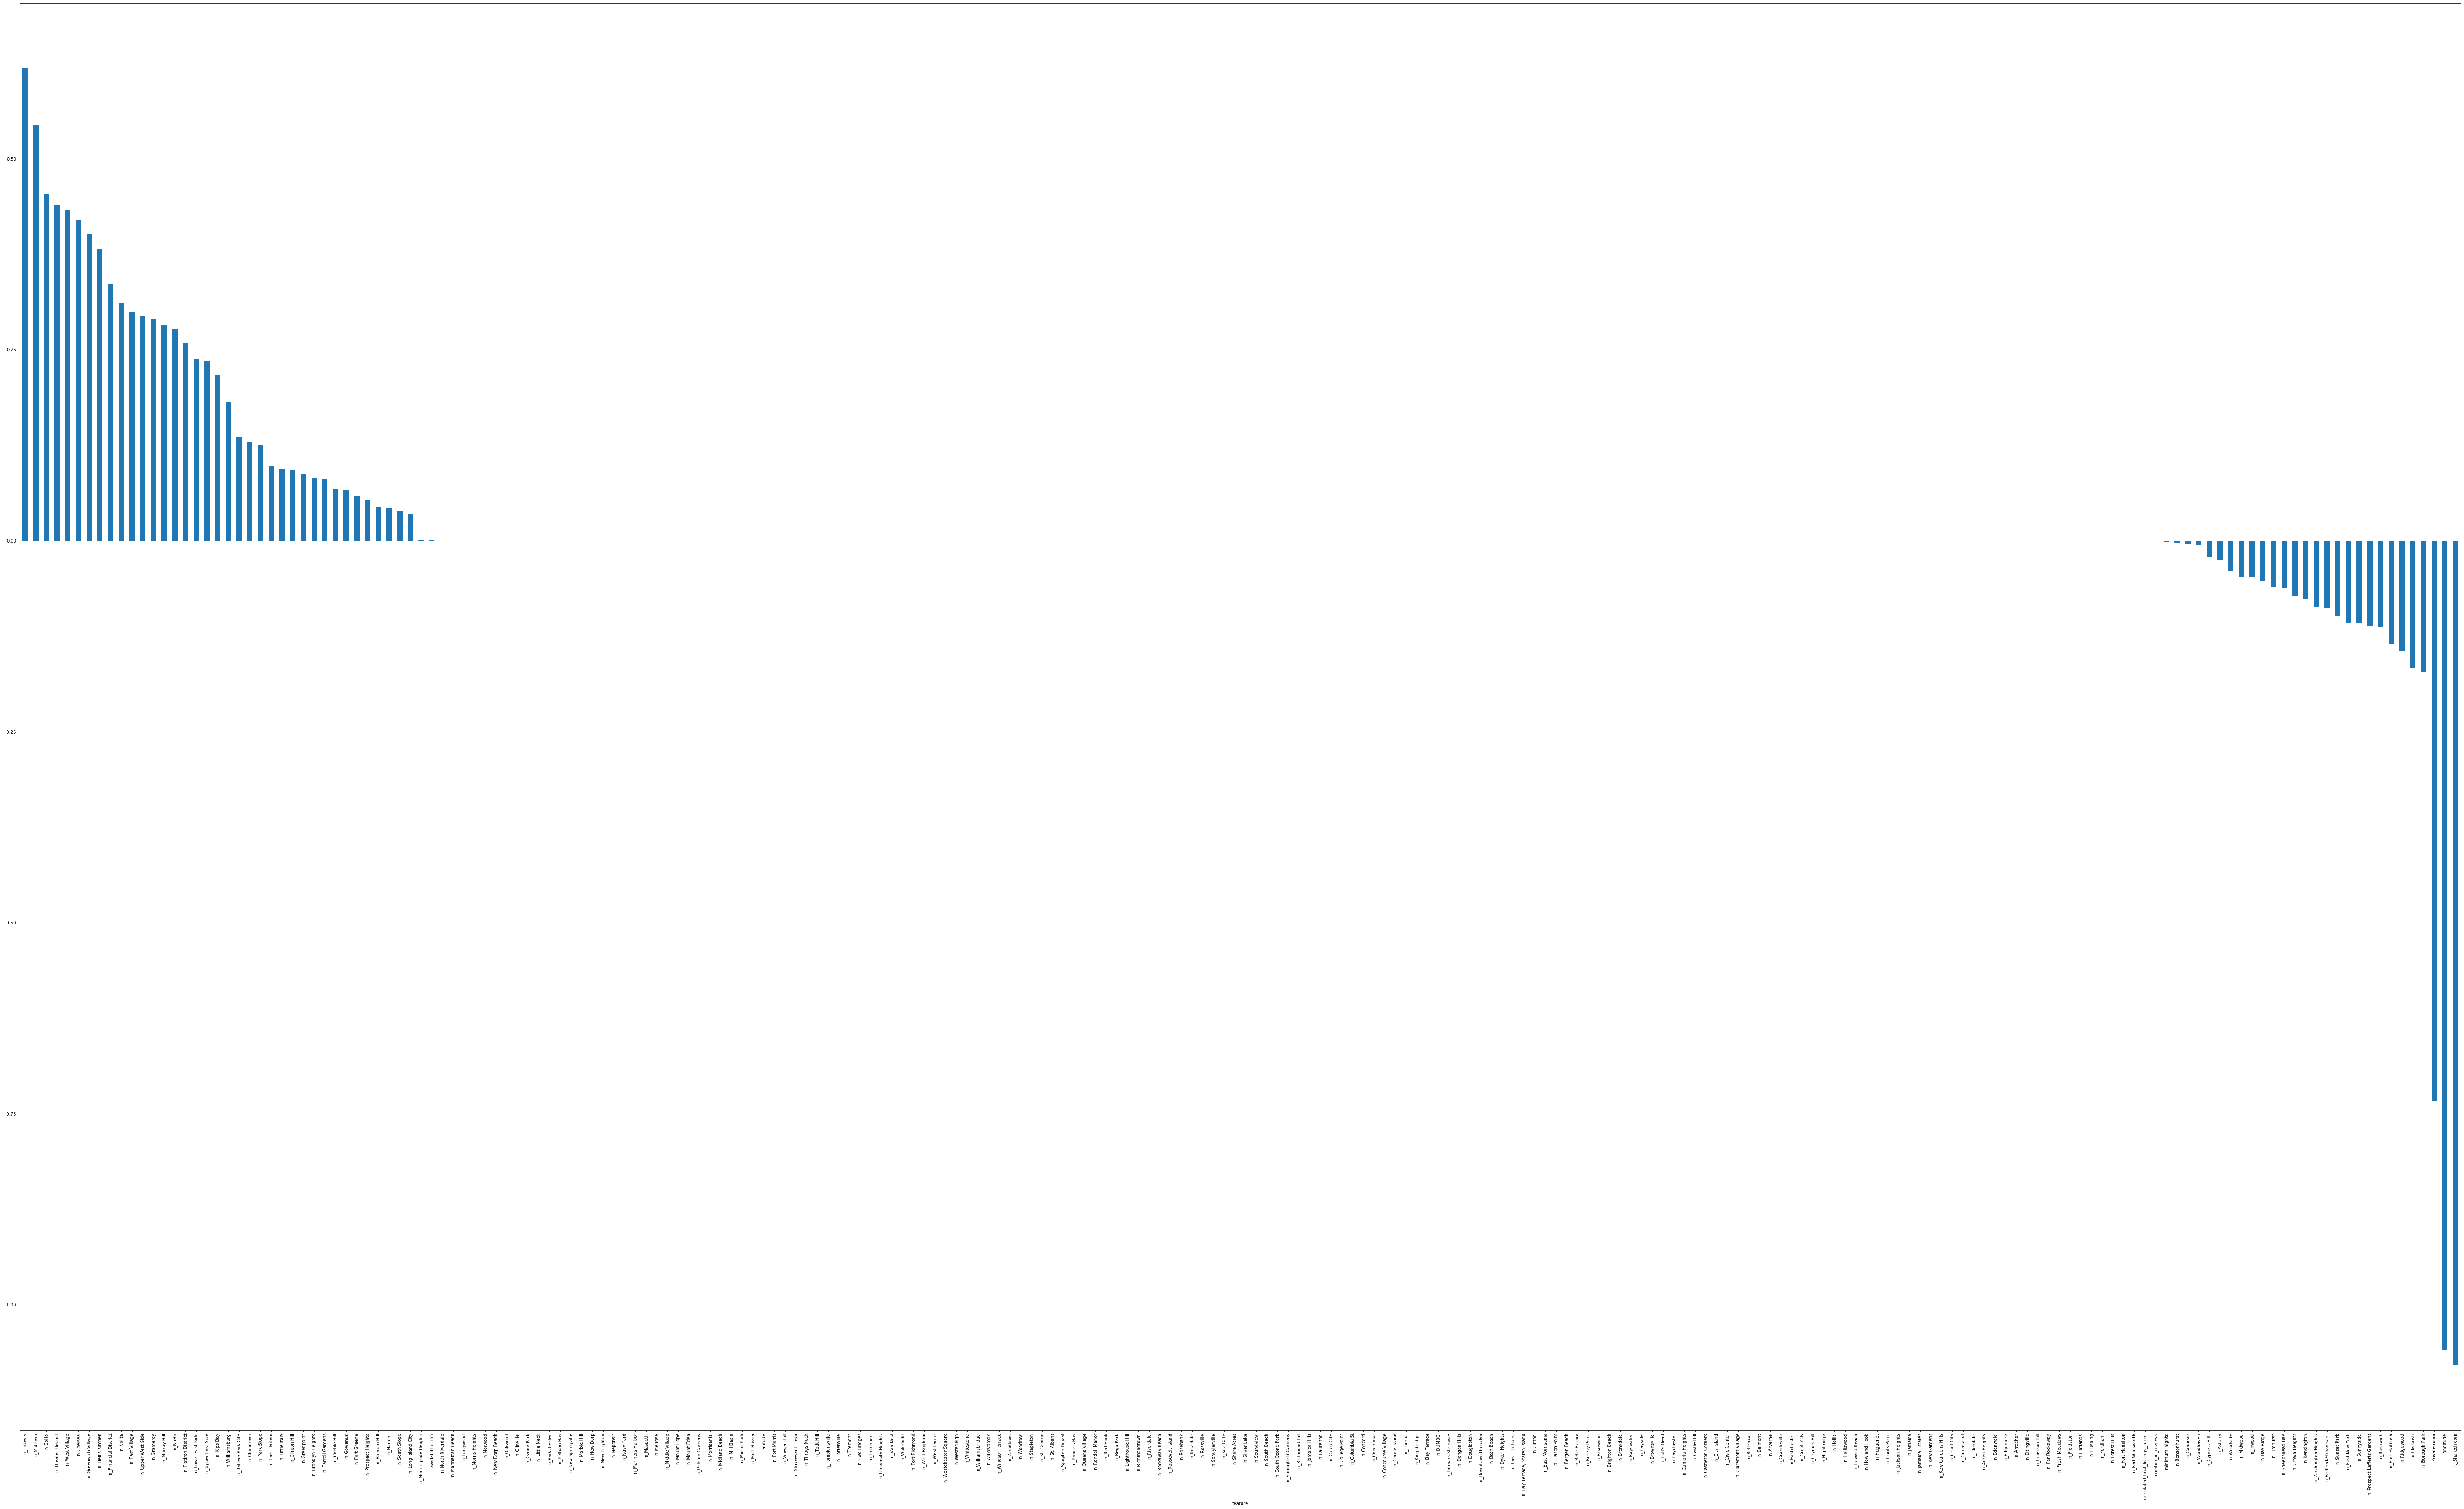

In [213]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": elastic_reg.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(100, 60));

In [211]:
print_metrics(y_test, y_pred_elastic)

MAE: 67.74309819765678
RMSE: 239.96380143227546
R2: 0.43652976523527864
MAPE: 6.84358612838046


In [214]:
from sklearn.linear_model import Ridge

# Объявили модель
ridge_reg = Ridge(alpha=0.001)

# Обучили модель на тренировочной выборке 
ridge_reg.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_ridge = ridge_reg.predict(X_test)

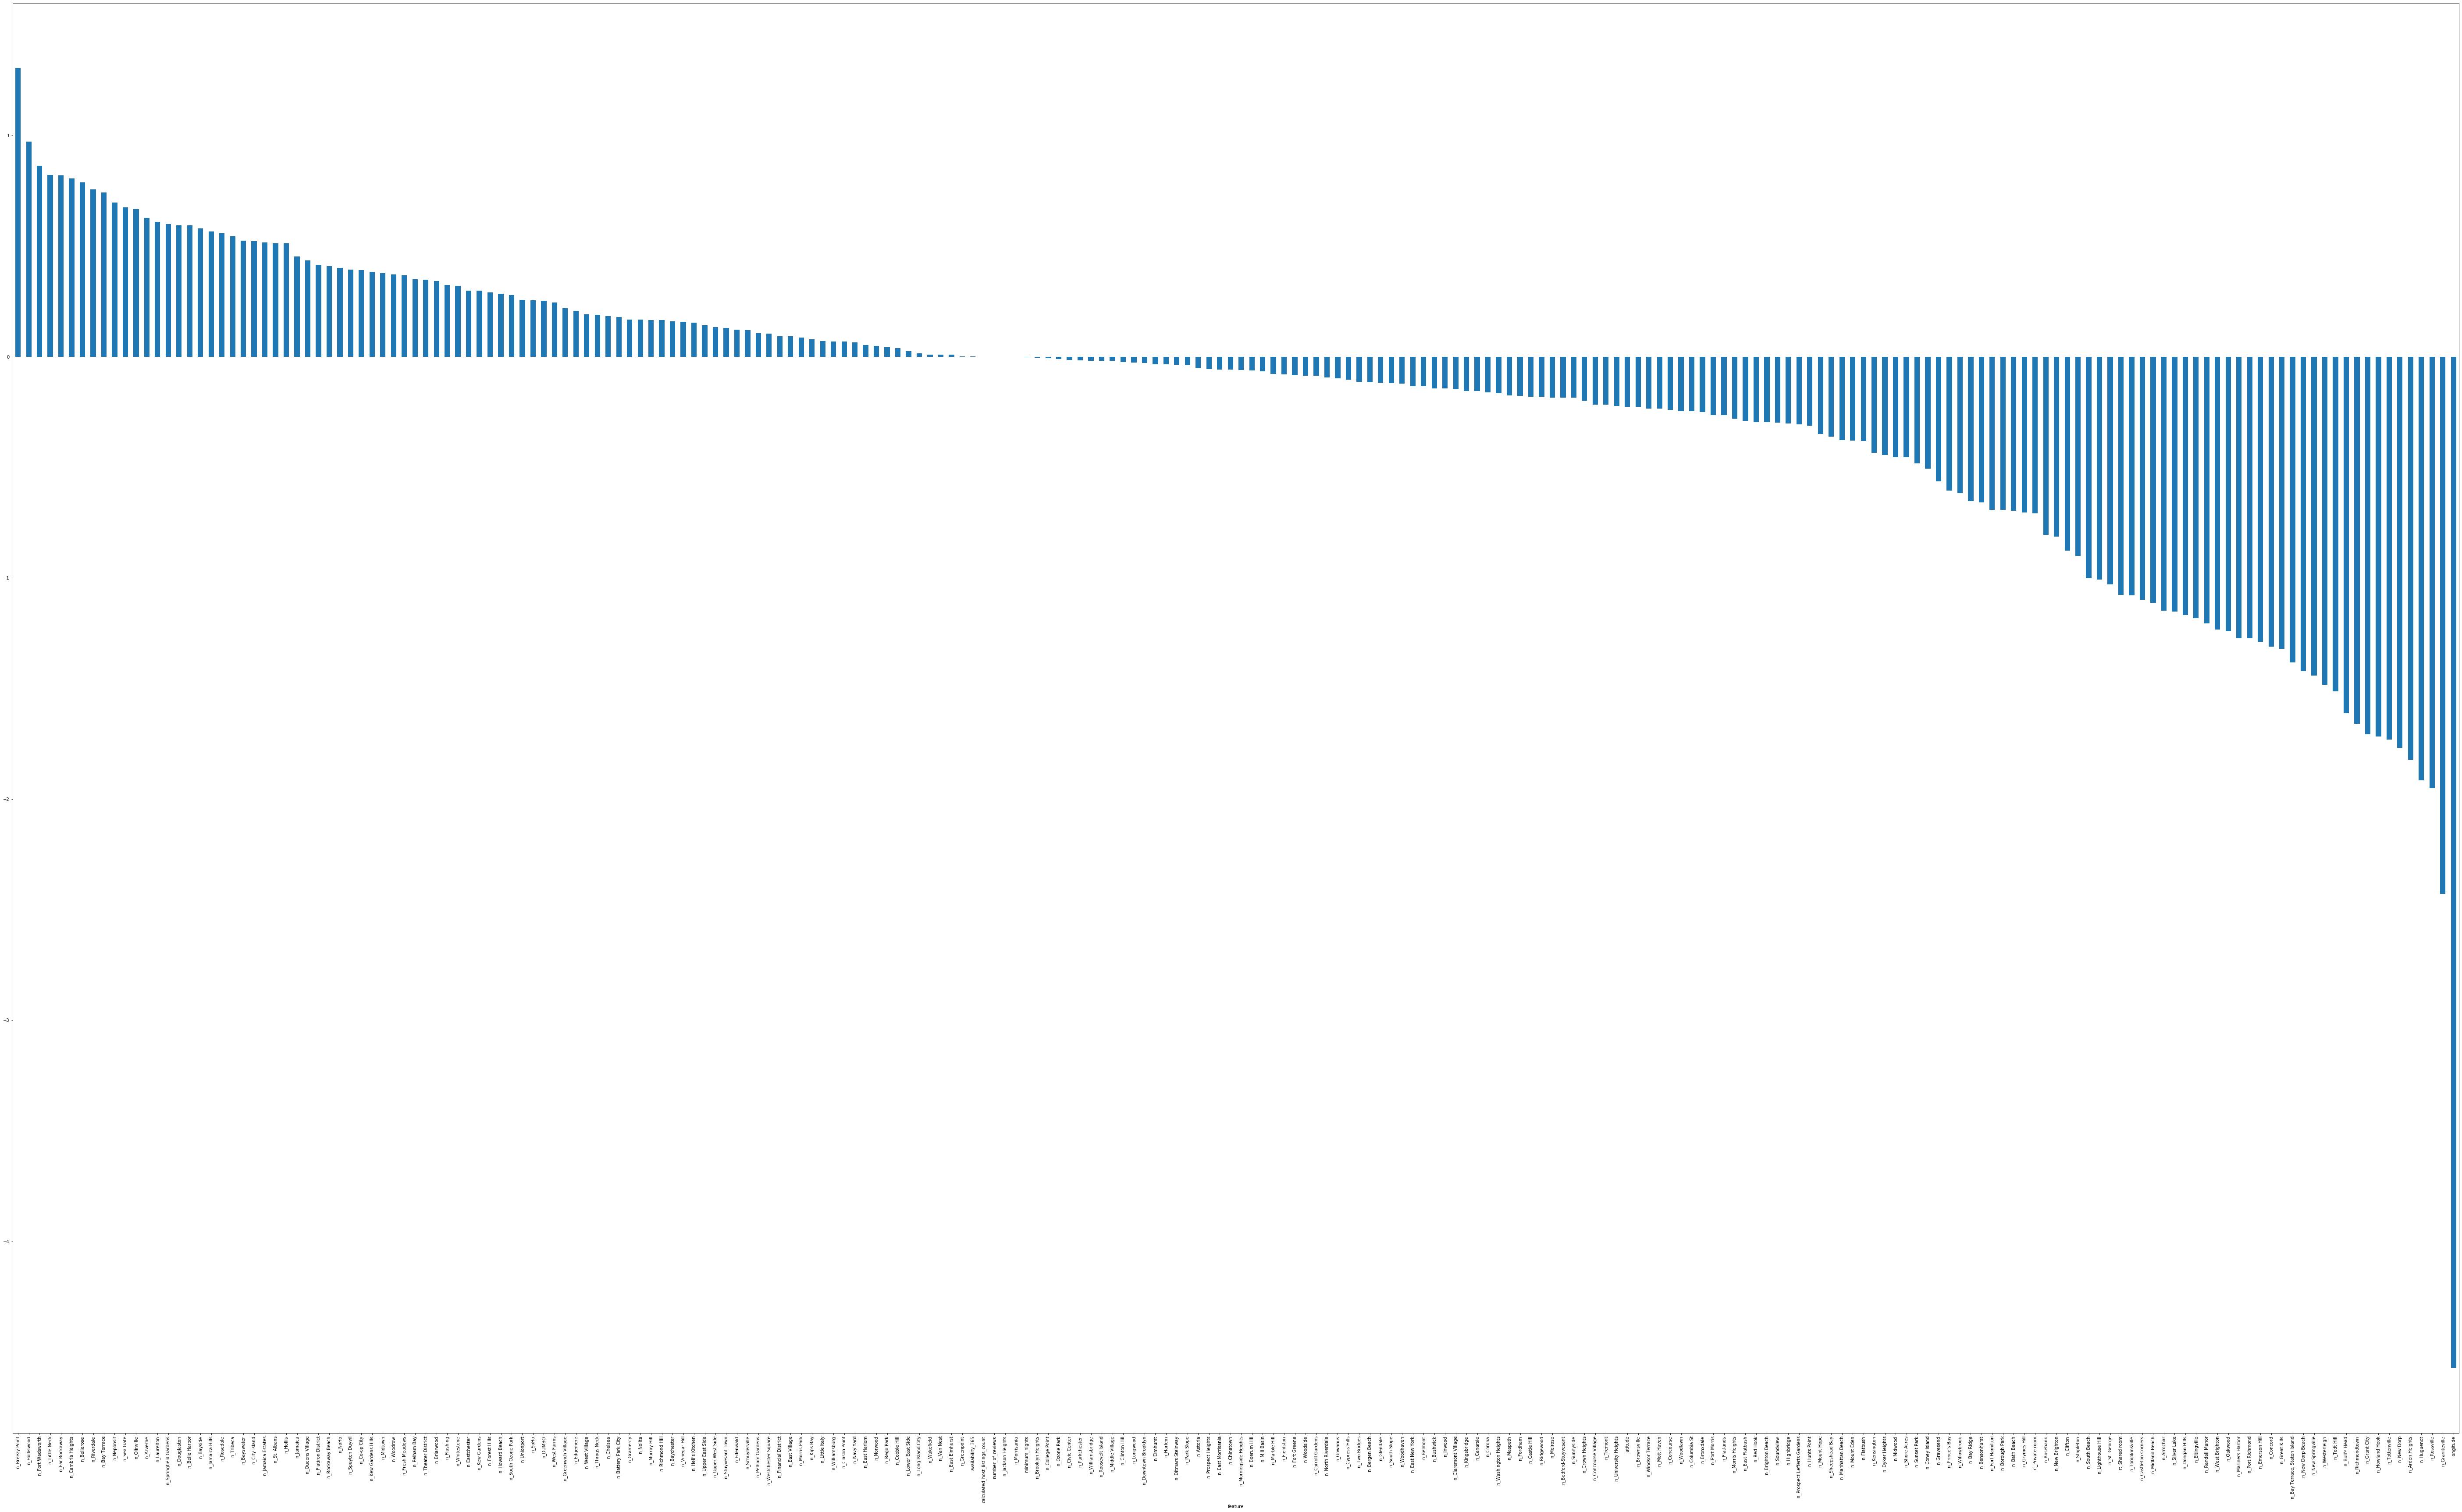

In [215]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": ridge_reg.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(100, 60));

In [216]:
print_metrics(y_test, y_pred_ridge)

MAE: 63.12128353736454
RMSE: 234.741010682993
R2: 0.5382772480957518
MAPE: 6.004699413058001


In [217]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rt_Private room,rt_Shared room,n_Arden Heights,...,n_Westerleigh,n_Whitestone,n_Williamsbridge,n_Williamsburg,n_Willowbrook,n_Windsor Terrace,n_Woodhaven,n_Woodlawn,n_Woodrow,n_Woodside
0,40.64749,-73.97237,5.003946,1,9,6,365,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,40.75362,-73.98377,5.416100,1,45,2,355,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,5.010635,3,0,1,365,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40.68514,-73.95976,4.488636,1,270,1,194,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,4.382027,10,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
# from scipy.spatial import distance
# ny_center = (40.73061,  -73.93524)
# ny_center = np.array((40.73061,  -73.93524)) # NY coords from google

ny_lat = 40.73061
ny_long = -73.93524

In [238]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

df['dist'] = haversine_np(df['longitude'], df['latitude'], ny_long, ny_lat)

# df['dist'] = np.linalg.norm(np.array((df['latitude'], df['longitude'])) - ny_center)
# df['dist'] = distance.euclidean((df['latitude'], df['longitude']), ny_center)

In [239]:
df.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,rt_Private room,rt_Shared room,n_Arden Heights,...,n_Whitestone,n_Williamsbridge,n_Williamsburg,n_Willowbrook,n_Windsor Terrace,n_Woodhaven,n_Woodlawn,n_Woodrow,n_Woodside,dist
0,40.64749,-73.97237,5.003946,1,9,6,365,1,0,0,...,0,0,0,0,0,0,0,0,0,9.752196
1,40.75362,-73.98377,5.416100,1,45,2,355,0,0,0,...,0,0,0,0,0,0,0,0,0,4.820087
2,40.80902,-73.94190,5.010635,3,0,1,365,1,0,0,...,0,0,0,0,0,0,0,0,0,8.731329
3,40.68514,-73.95976,4.488636,1,270,1,194,0,0,0,...,0,0,0,0,0,0,0,0,0,5.458729
4,40.79851,-73.94399,4.382027,10,9,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7.581250


In [240]:
df = df.drop(['latitude','longitude'], 1)

In [241]:
df_train, df_test = train_test_split(df, test_size = 0.3)
y_train = df_train.price 
y_test = df_test.price 

X_train = df_train.drop('price', axis=1).get_values()
X_test = df_test.drop('price', axis=1).get_values()


In [242]:
# Объявили модель
ridge_reg = Ridge(alpha=0.001)

# Обучили модель на тренировочной выборке 
ridge_reg.fit(X_train, y_train)

# Сделали прогнозы на тестовой выборке 
y_pred_ridge = ridge_reg.predict(X_test)

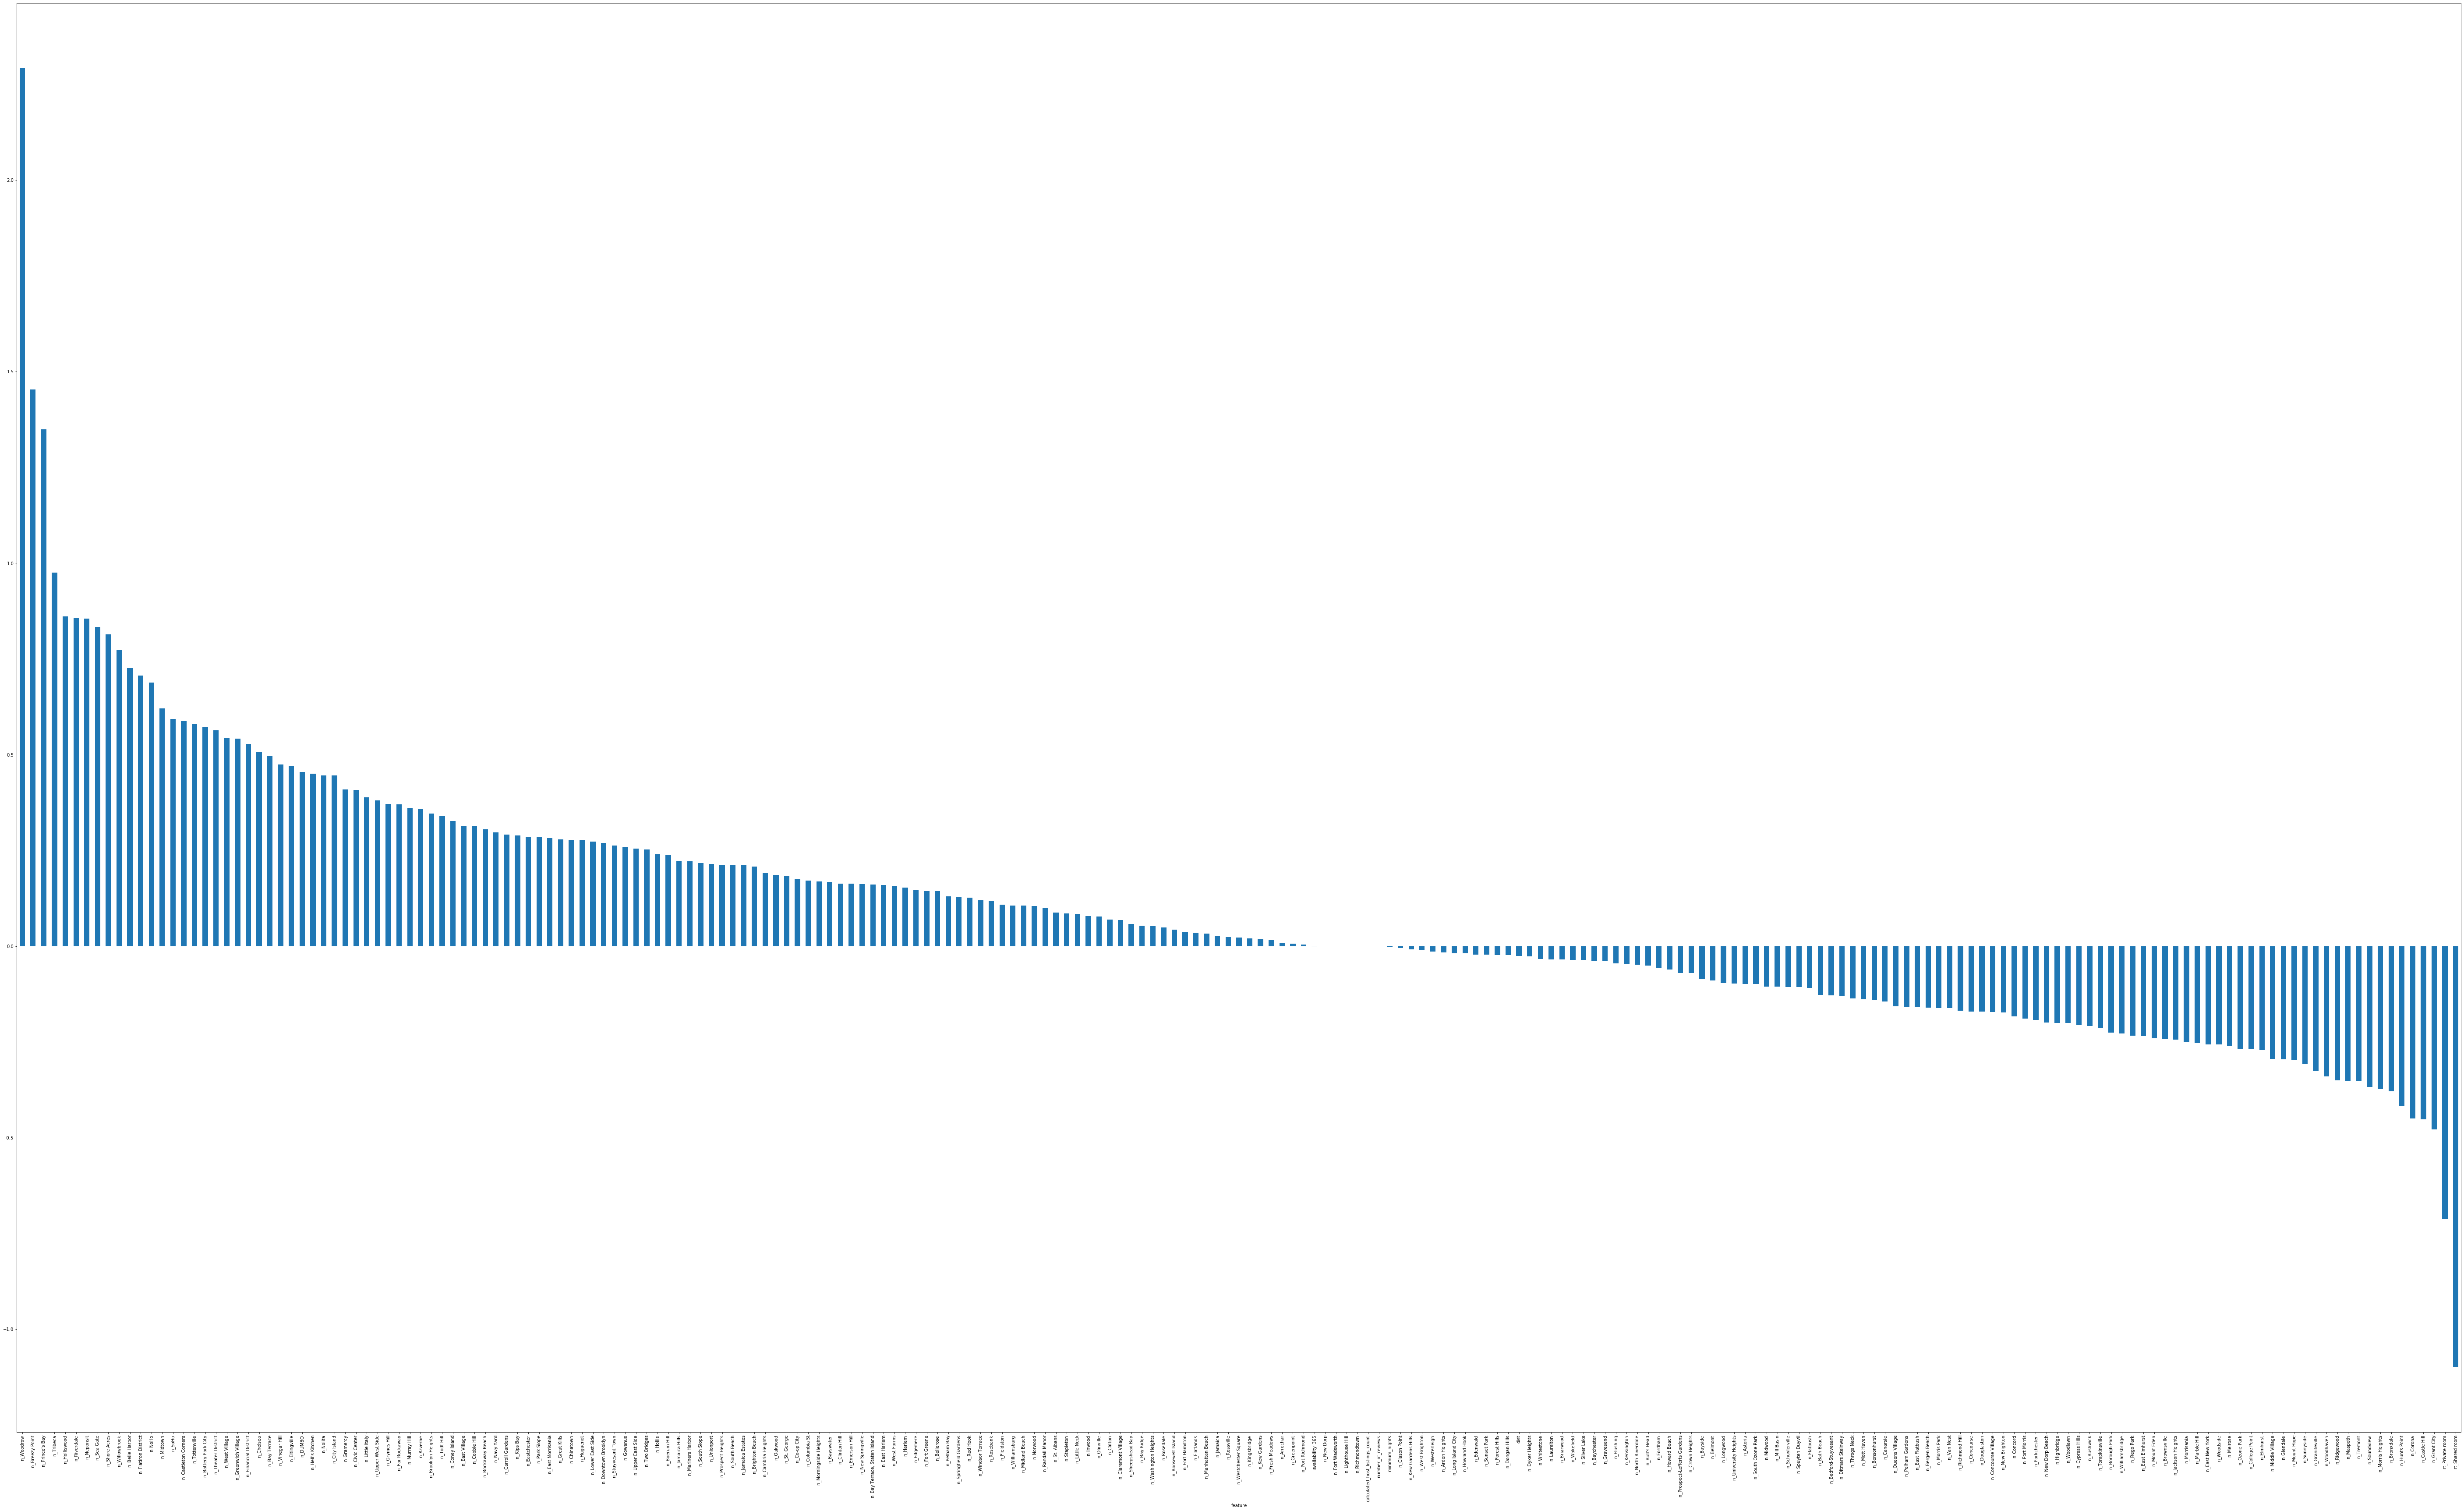

In [243]:
featureImportance = pd.DataFrame({"feature": df.drop('price',axis=1).columns, 
                                  "importance": ridge_reg.coef_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(100, 60));

In [244]:
print_metrics(y_test, y_pred_ridge)

MAE: 65.50242310799526
RMSE: 272.99545989210884
R2: 0.5247513422753767
MAPE: 6.05296696745326
